# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_count = len(mouse_metadata["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#unknown how to pull array as shown in the example

In [4]:
duplicate_check = study_data_complete.duplicated(subset=["Mouse ID","Timepoint"])
duplicate_check

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ids_g989 = study_data_complete.loc[(study_data_complete["Mouse ID"] == "g989" ), :] 
duplicate_ids_g989

#matches what was shown, but discription implies we're suppose to show all duplicates. 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)
study_data_clean.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(study_data_clean ["Mouse ID"].unique())
clean_count

#off by 1?

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = study_data_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = study_data_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = study_data_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev_tumor = study_data_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_err_tumor = study_data_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
drug_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                             #correct
                             "Median Tumor Volume": median_tumor,
                             #correct
                             "Tumor Volume Variance": tumor_variance,
                             #correct
                             "Tumor Volume Std. Dev.": std_dev_tumor,
                             #correct
                             "Tumor Volume Std. Err.": std_err_tumor})
                             #correct

drug_summary.index.name = None

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
drugs_results = study_data_clean.set_index(["Drug Regimen"])["Tumor Volume (mm3)"]
drugs_results

Drug Regimen
Capomulin    45.000000
Ketapril     45.000000
Ketapril     45.000000
Ketapril     45.000000
Ketapril     45.000000
               ...    
Capomulin    41.581521
Capomulin    31.023923
Ceftamin     61.433892
Placebo      58.634971
Stelasyn     72.555239
Name: Tumor Volume (mm3), Length: 1883, dtype: float64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
## ".agg" function not covered. Unable to decipher via internet. Focused on "single line" aspect of challenge.

# Assemble the resulting series into a single summary DataFrame.
agg_summary = pd.DataFrame({"mean": study_data_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],
                             #correct
                             "median": study_data_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"],
                             #correct
                             "var": study_data_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"],
                             #correct
                             "std": study_data_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"],
                             #correct
                             "sem": study_data_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]})
                             #correct
    
agg_summary.title = "Tumor Volume (mm3)"
agg_summary.index.name = "Drug Regimen"

agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [1]:
#Bar Graph Data
regimen_points = study_data_clean["Drug Regimen"].value_counts()
regimen_table = pd.DataFrame({"Value Counts":regimen_points})
regimen_table.reset_index(inplace=True)
regimen_table = regimen_table.rename(columns={"index":"Drug Regimen"})
regimen_table

NameError: name 'study_data_clean' is not defined

<AxesSubplot:xlabel='Drug Regimen'>

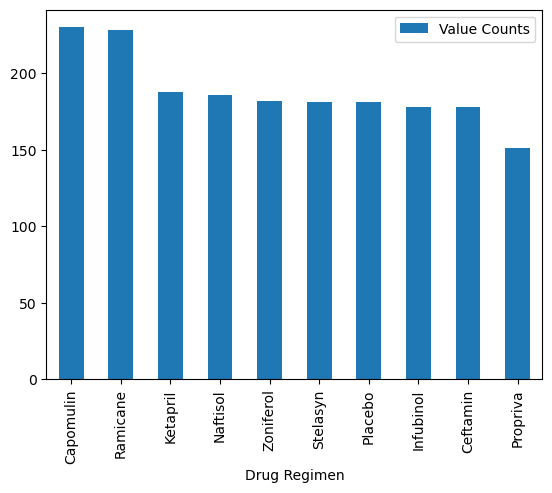

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_table.plot.bar(x="Drug Regimen",y="Value Counts")

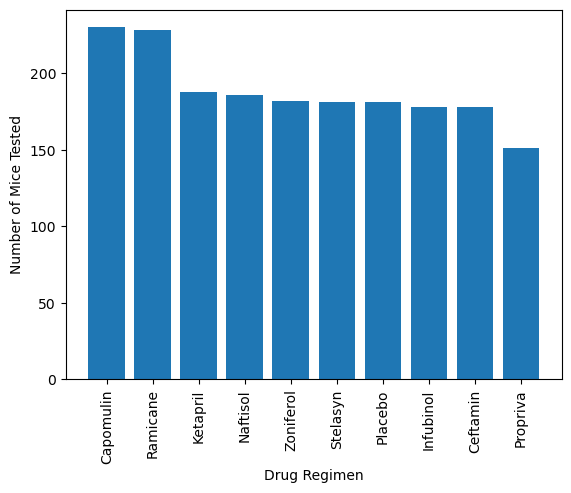

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(regimen_table["Drug Regimen"], regimen_table["Value Counts"], align="center")
plt.xlabel("Drug Regimen")
plt.xticks(regimen_table["Drug Regimen"], rotation="vertical")
plt.ylabel("Number of Mice Tested")
plt.show()

In [14]:
#Pie Graph Data
sex_points = study_data_clean["Sex"].value_counts()
sex_table = pd.DataFrame({"Sex":sex_points})
sex_table.reset_index(inplace=True)
sex_table = sex_table.rename(columns={"index":"Gender"})
sex_labels= ["Male","Female"]
sex_table

,Gender,Sex
0,Male,958
1,Female,925


<AxesSubplot:ylabel='Sex'>

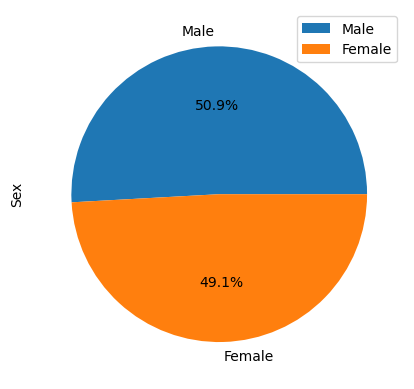

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_table.plot.pie(x="Gender",y="Sex", labels = sex_labels, autopct='%1.1f%%')

# off by 0.1%

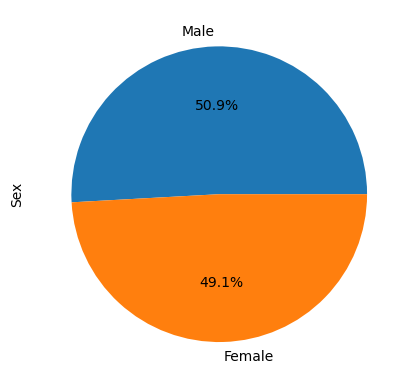

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_table["Sex"], labels=sex_labels,autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.show()

#off by 0.1%

## Quartiles, Outliers and Boxplots

In [17]:
#New database with values arranged by Mouse ID 
#(kept "study_data_clean" as is to match starter copy)
study_data_tidy = study_data_complete.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)
study_data_tidy = study_data_tidy.sort_values("Mouse ID", ascending=True)
study_data_tidy = study_data_tidy.reset_index(drop=True)

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_column = study_data_tidy["Drug Regimen"]
drug_filter = study_data_tidy[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen","Weight (g)"]][(drug_column=="Capomulin") |
                                                                        (drug_column=="Ramicane") |
                                                                        (drug_column=="Infubinol") |
                                                                        (drug_column=="Ceftamin")]
drug_filter

# Start by getting the last (greatest) timepoint for each mouse
final_tumors = drug_filter.sort_values("Timepoint", ascending=False).drop_duplicates(["Mouse ID"]).sort_index()
final_tumors

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Already saved into dataframe ^^

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Weight (g)
9,a203,45,67.973419,Infubinol,23
12,a251,45,65.525743,Infubinol,25
38,a275,45,62.999356,Ceftamin,28
58,a411,45,38.407618,Ramicane,22
72,a444,45,43.047543,Ramicane,25
...,...,...,...,...,...
1809,y769,45,68.594745,Ceftamin,27
1824,y793,45,31.896238,Capomulin,17
1831,y865,45,64.729837,Ceftamin,26
1844,z578,45,30.638696,Ramicane,16


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ceftamin","Infubinol","Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
outlier_filter = drug_filter[["Tumor Volume (mm3)"]]\
                        [(drug_column=="Capomulin") |
                         (drug_column=="Ramicane") |
                         (drug_column=="Infubinol") |
                         (drug_column=="Ceftamin")] 
    
    # add subset
        #pd.outlier_filter.loc[]
        #?
    
    # Determine outliers using upper and lower bounds   

        #went down a bad rabbit hole. Unable to determine how to get correct answer.
        #likely flawed logic on my part
        
#cap_fil = outlier_filter[["Tumor Volume (mm3)"]][(drug_column=="Capomulin")]
#cap_quart= cap_fil["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
#cap_low_q = cap_quart[0.25]
#cap_upp_q = cap_quart[0.75]
#cap_inter_q = cap_upp_q - cap_low_q
#cap_low_b = cap_low_q   - (1.5*cap_inter_q)
#cap_upp_b = cap_upp_q + (1.5*cap_inter_q)
#out_final = [cap_fil >= cap_upp_b | cap_fil <= cap_low_b]
#out_final_vol = out_final["Tumor Volume (mm3)"]
#print(f"Capomulin's potensial outlers: {out_final_vol}")

#ram_fil = drug_filter[["Tumor Volume (mm3)"]][(drug_column=="Ramicane")]
#inf_fil = drug_filter[["Tumor Volume (mm3)"]][(drug_column=="Infubinol")]
#cef_fil = drug_filter[["Tumor Volume (mm3)"]][(drug_column=="Ceftamin")]

#Best I can do:
cap_desc = outlier_filter.groupby(drug_column=="Capomulin").describe()
print(f"Capomulin's potensial outlers:{cap_desc}")
print("-------------------------------------------------------------------------")
ram_desc = outlier_filter.groupby(drug_column=="Ramicane").describe()
print(f"Capomulin's potensial outlers:{ram_desc}")
print("-------------------------------------------------------------------------")
inf_desc = outlier_filter.groupby(drug_column=="Infubinol").describe()
print(f"Capomulin's potensial outlers:{inf_desc}")
print("-------------------------------------------------------------------------")
cef_desc = outlier_filter.groupby(drug_column=="Ceftamin").describe()
print(f"Capomulin's potensial outlers:{cef_desc}")
print("-------------------------------------------------------------------------")

Capomulin's potensial outlers:             Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
False                     584.0  47.849555  8.459140  22.050126  43.156357   
True                      230.0  40.675741  4.994774  23.343598  37.685933   

                                               
                    50%        75%        max  
Drug Regimen                                   
False         46.462210  53.464764  72.226731  
True          41.557809  45.000000  48.158209  
-------------------------------------------------------------------------
Capomulin's potensial outlers:             Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
F

C:\Users\Admin\anaconda3\envs\pyData2\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#wasn't able to get data, so unable to graph.

## Line and Scatter Plots

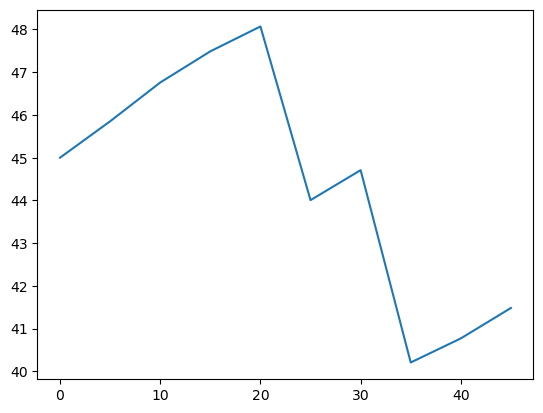

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
loc_l509 = drug_filter.loc[(drug_filter["Mouse ID"] == "l509" ), :] 
loc_l509_sort = loc_l509.sort_values("Timepoint", ascending=True)
l509_line, = plt.plot(loc_l509_sort["Timepoint"], loc_l509_sort["Tumor Volume (mm3)"], label="Capomulin")

C:\Users\Admin\anaconda3\envs\pyData2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


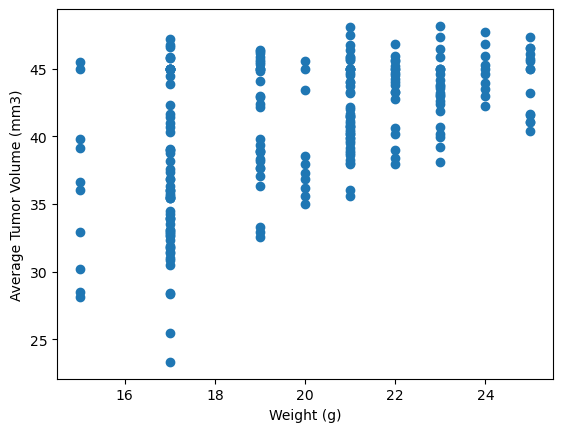

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_fil = drug_filter[["Tumor Volume (mm3)","Weight (g)"]][(drug_column=="Capomulin")]
#cap_fil = cap_fil.reset_index(drop=True)

#unable to figure out how to simplify/ average data effectively. 
#cap_avg_g = cap_fil["Tumor Volume (mm3)"].groupby(cap_fil["Weight (g)"]).mean()

x_plot = cap_fil["Weight (g)"]
y_plot = cap_fil["Tumor Volume (mm3)"]
plt.scatter(x_plot,y_plot)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

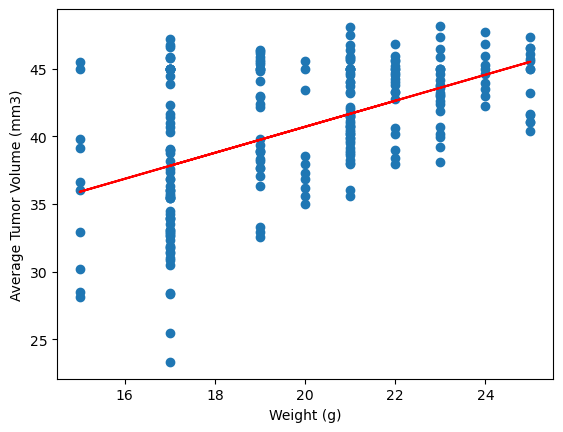

The correlation between mouse weight and the average tumor volume is 0.9609669432428382


In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#bad data, but graph technique should be good. 
x_plot = cap_fil["Weight (g)"]
y_plot = cap_fil["Tumor Volume (mm3)"]
(slope, intercept, _, _, _) = linregress(x_plot, y_plot)
regress_v = x_plot * slope + intercept
plt.scatter(x_plot,y_plot)
plt.plot(x_plot,regress_v,"red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {slope}")